In [38]:
import pandas as pd

In [39]:
house_data = pd.read_csv('chicagohouseprices.csv')

In [40]:
# delete the index column as we don't need it
del house_data['Unnamed: 0']

In [41]:
# step 1: data exploration

# house_data.head()
# house_data.describe()
# house_data.Bath.count(), # count a given column
# house_data.columns
# house_data.EstimatedPrice

# looking for correlations between features
# -ve means negative relationship, +ve means positive relationship
house_data.corr()

# trying to get a feel of how housesizeinsqft and bath affect the price
# house_data.groupby(['HouseSizeSqft', 'Bath'])['Price'].mean()
# house_data.groupby('Age').mean()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


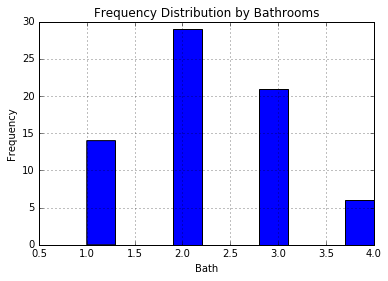

In [22]:
# some visualizations on the data
%matplotlib inline
import matplotlib.pyplot as plt

house_data.Bath.hist()
plt.title('Frequency Distribution by Bathrooms')
plt.xlabel('Bath')
plt.ylabel('Frequency')

# note the frequency numbers are too low, we might have lots of NaN values for bathrooms

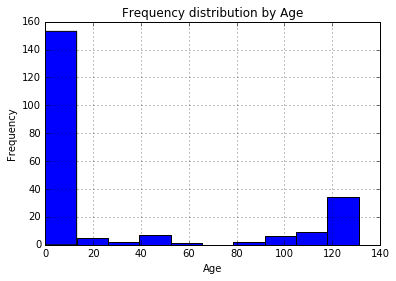

In [42]:
house_data.Age.hist()
plt.title('Frequency distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#try out a scatteplot 
house_data.plot.scatter()

In [29]:
# preparing the data for linear regression

# extract the y-values
house_prices = house_data['Price']
del house_data['Price']

In [24]:
# remove non numeric columns
del house_data['HouseType']
del house_data['Address']
del house_data['Neighborhood']

In [30]:
# lets also assume that if a house has NaN for bath, it has one bathroom because surely it should have atleast one
house_data['Bath'] = house_data['Bath'].fillna(1)

In [31]:
# split the data to create a training and test set.
from sklearn.cross_validation import train_test_split
training_set_features, test_set_features, train_set_prices, test_set_prices = train_test_split(house_data, house_prices, random_state=1)

In [32]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(training_set_features, train_set_prices) # talk abit about what's going on here

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# predicting the price of a given house
linear_regression.predict(test_set_features.iloc[0])

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 605552.0668851])

In [194]:
# model evaluation, how do we know whether our predictions are correct?